In [20]:
from requests import get
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
%matplotlib inline

In [2]:
url = (
'https://api.coronavirus.data.gov.uk/v1/data?'
'filters=areaType=overview&'
'structure={"date":"date","newCases":"newCasesByPublishDate", "newTests":"newTestsByPublishDate"}'
)
response = get(url, timeout=10)
    
if response.status_code >= 400:
    raise RuntimeError(f'Request failed: { response.text }')
        
COVIDData = response.json()

COVIDDF = pd.DataFrame(COVIDData["data"])
COVIDDF

,date,newCases,newTests
0,2020-12-15,18450,NaN
1,2020-12-14,20263,277944.0
2,2020-12-13,18447,312638.0
3,2020-12-12,21502,359457.0
4,2020-12-11,21672,395510.0
...,...,...,...
343,2020-01-07,0,NaN
344,2020-01-06,0,NaN
345,2020-01-05,0,NaN
346,2020-01-04,0,NaN


In [29]:
FTSEData = pd.read_csv("FTSE.csv")
FTSEData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-31,5563.700195,5702.700195,5545.899902,5672.000000,5672.000000,1602112800
1,2020-04-01,5672.000000,5672.000000,5414.700195,5454.600098,5454.600098,1670362100
2,2020-04-02,5454.600098,5552.399902,5395.100098,5480.200195,5480.200195,1554286900
3,2020-04-03,5480.200195,5486.299805,5396.700195,5415.500000,5415.500000,1180517400
4,2020-04-06,5415.500000,5590.600098,5415.500000,5582.399902,5582.399902,1207951800
...,...,...,...,...,...,...,...
176,2020-12-09,6558.799805,6623.000000,6558.799805,6564.299805,6564.299805,769345300
177,2020-12-10,6564.299805,6640.700195,6561.100098,6599.799805,6599.799805,1109877200
178,2020-12-11,6599.799805,6607.399902,6520.500000,6546.799805,6546.799805,1069085700
179,2020-12-14,6546.799805,6583.700195,6524.700195,6531.799805,6531.799805,870265400


In [4]:
COVIDDF.dropna(inplace=True)
COVIDDF["newTests"] = COVIDDF["newTests"].astype(int)
COVIDDF["positive Test Percentage"] = 2
COVIDDF["positive Test Percentage"] = COVIDDF["positive Test Percentage"].astype(float)
COVIDDF['positive Test Percentage'] = list(map(lambda x,y: x/y, COVIDDF['newCases'],COVIDDF['newTests']))
COVIDDF["positive Test Percentage"] = COVIDDF["positive Test Percentage"] * 100

COVIDDF['date'] = pd.to_datetime(COVIDDF['date'], dayfirst = False, yearfirst = False)
COVIDDF.sort_values(by=["date"], inplace=True, ascending=True)

COVIDDF

,date,newCases,newTests,positive Test Percentage
259,2020-03-31,3250,11896,27.320108
258,2020-04-01,4567,11947,38.227170
257,2020-04-02,4522,13623,33.193863
256,2020-04-03,4672,14629,31.936564
255,2020-04-04,4000,16080,24.875622
...,...,...,...,...
5,2020-12-10,20964,404236,5.186079
4,2020-12-11,21672,395510,5.479507
3,2020-12-12,21502,359457,5.981800
2,2020-12-13,18447,312638,5.900434


In [33]:
FTSEData.rename(columns={"Date": "date"}, inplace=True)
FTSEData['date'] = pd.to_datetime(FTSEData['date'], dayfirst = False, yearfirst = False)
FTSEData.sort_values(by=["date"], inplace=True, ascending=True)
FTSEData["Average"] = (FTSEData["High"] + FTSEData["Low"])/ 2
FTSEData

,date,Open,High,Low,Close,Adj Close,Volume,Average
0,2020-03-31,5563.700195,5702.700195,5545.899902,5672.000000,5672.000000,1602112800,5624.300049
1,2020-04-01,5672.000000,5672.000000,5414.700195,5454.600098,5454.600098,1670362100,5543.350098
2,2020-04-02,5454.600098,5552.399902,5395.100098,5480.200195,5480.200195,1554286900,5473.750000
3,2020-04-03,5480.200195,5486.299805,5396.700195,5415.500000,5415.500000,1180517400,5441.500000
4,2020-04-06,5415.500000,5590.600098,5415.500000,5582.399902,5582.399902,1207951800,5503.050049
...,...,...,...,...,...,...,...,...
176,2020-12-09,6558.799805,6623.000000,6558.799805,6564.299805,6564.299805,769345300,6590.899902
177,2020-12-10,6564.299805,6640.700195,6561.100098,6599.799805,6599.799805,1109877200,6600.900147
178,2020-12-11,6599.799805,6607.399902,6520.500000,6546.799805,6546.799805,1069085700,6563.949951
179,2020-12-14,6546.799805,6583.700195,6524.700195,6531.799805,6531.799805,870265400,6554.200195


In [35]:
testDF = COVIDDF.merge(FTSEData, on="date")
testDF

,date,newCases,newTests,positive Test Percentage,Open,High,Low,Close,Adj Close,Volume,Average
0,2020-03-31,3250,11896,27.320108,5563.700195,5702.700195,5545.899902,5672.000000,5672.000000,1602112800,5624.300049
1,2020-04-01,4567,11947,38.227170,5672.000000,5672.000000,5414.700195,5454.600098,5454.600098,1670362100,5543.350098
2,2020-04-02,4522,13623,33.193863,5454.600098,5552.399902,5395.100098,5480.200195,5480.200195,1554286900,5473.750000
3,2020-04-03,4672,14629,31.936564,5480.200195,5486.299805,5396.700195,5415.500000,5415.500000,1180517400,5441.500000
4,2020-04-06,4143,13775,30.076225,5415.500000,5590.600098,5415.500000,5582.399902,5582.399902,1207951800,5503.050049
...,...,...,...,...,...,...,...,...,...,...,...
175,2020-12-08,12282,297220,4.132293,6555.399902,6567.600098,6518.399902,6558.799805,6558.799805,758186800,6543.000000
176,2020-12-09,16578,372446,4.451115,6558.799805,6623.000000,6558.799805,6564.299805,6564.299805,769345300,6590.899902
177,2020-12-10,20964,404236,5.186079,6564.299805,6640.700195,6561.100098,6599.799805,6599.799805,1109877200,6600.900147
178,2020-12-11,21672,395510,5.479507,6599.799805,6607.399902,6520.500000,6546.799805,6546.799805,1069085700,6563.949951


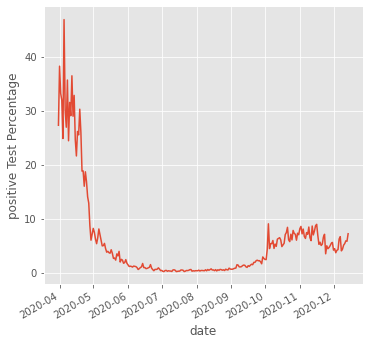

In [8]:
style.use('ggplot')

g = sns.relplot(x="date", y="positive Test Percentage", kind="line", data=COVIDDF)
g.fig.autofmt_xdate()
plt.show()

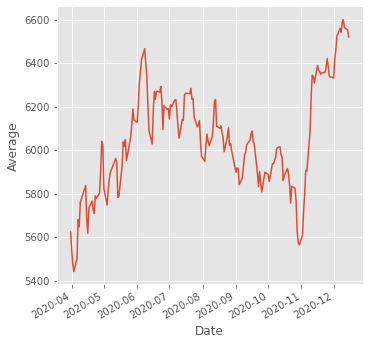

In [16]:

g = sns.relplot(x="Date", y="Average", kind="line", data=FTSEData)
g.fig.autofmt_xdate()
plt.show()

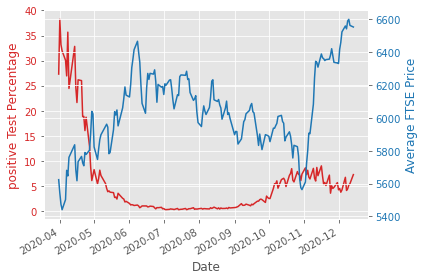

In [38]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('positive Test Percentage', color=color)
ax1.plot(testDF["date"], testDF["positive Test Percentage"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average FTSE Price', color=color)  # we already handled the x-label with ax1
ax2.plot(testDF["date"], testDF["Average"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()